<h1 style="color: #00BFFF;">00 |</h1>

In [2]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import warnings # warnings managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [4]:
# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h1 style="color: #00BFFF;">05 | Improving the Model</h1>

<h2 style="color: #008080;">Data Extraction</h2>

In [5]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

<h2 style="color: #008080;">Checking Outliers</h2>

In [6]:
# We will check Data distribtuions for all features, except for month encoded
house_features = cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

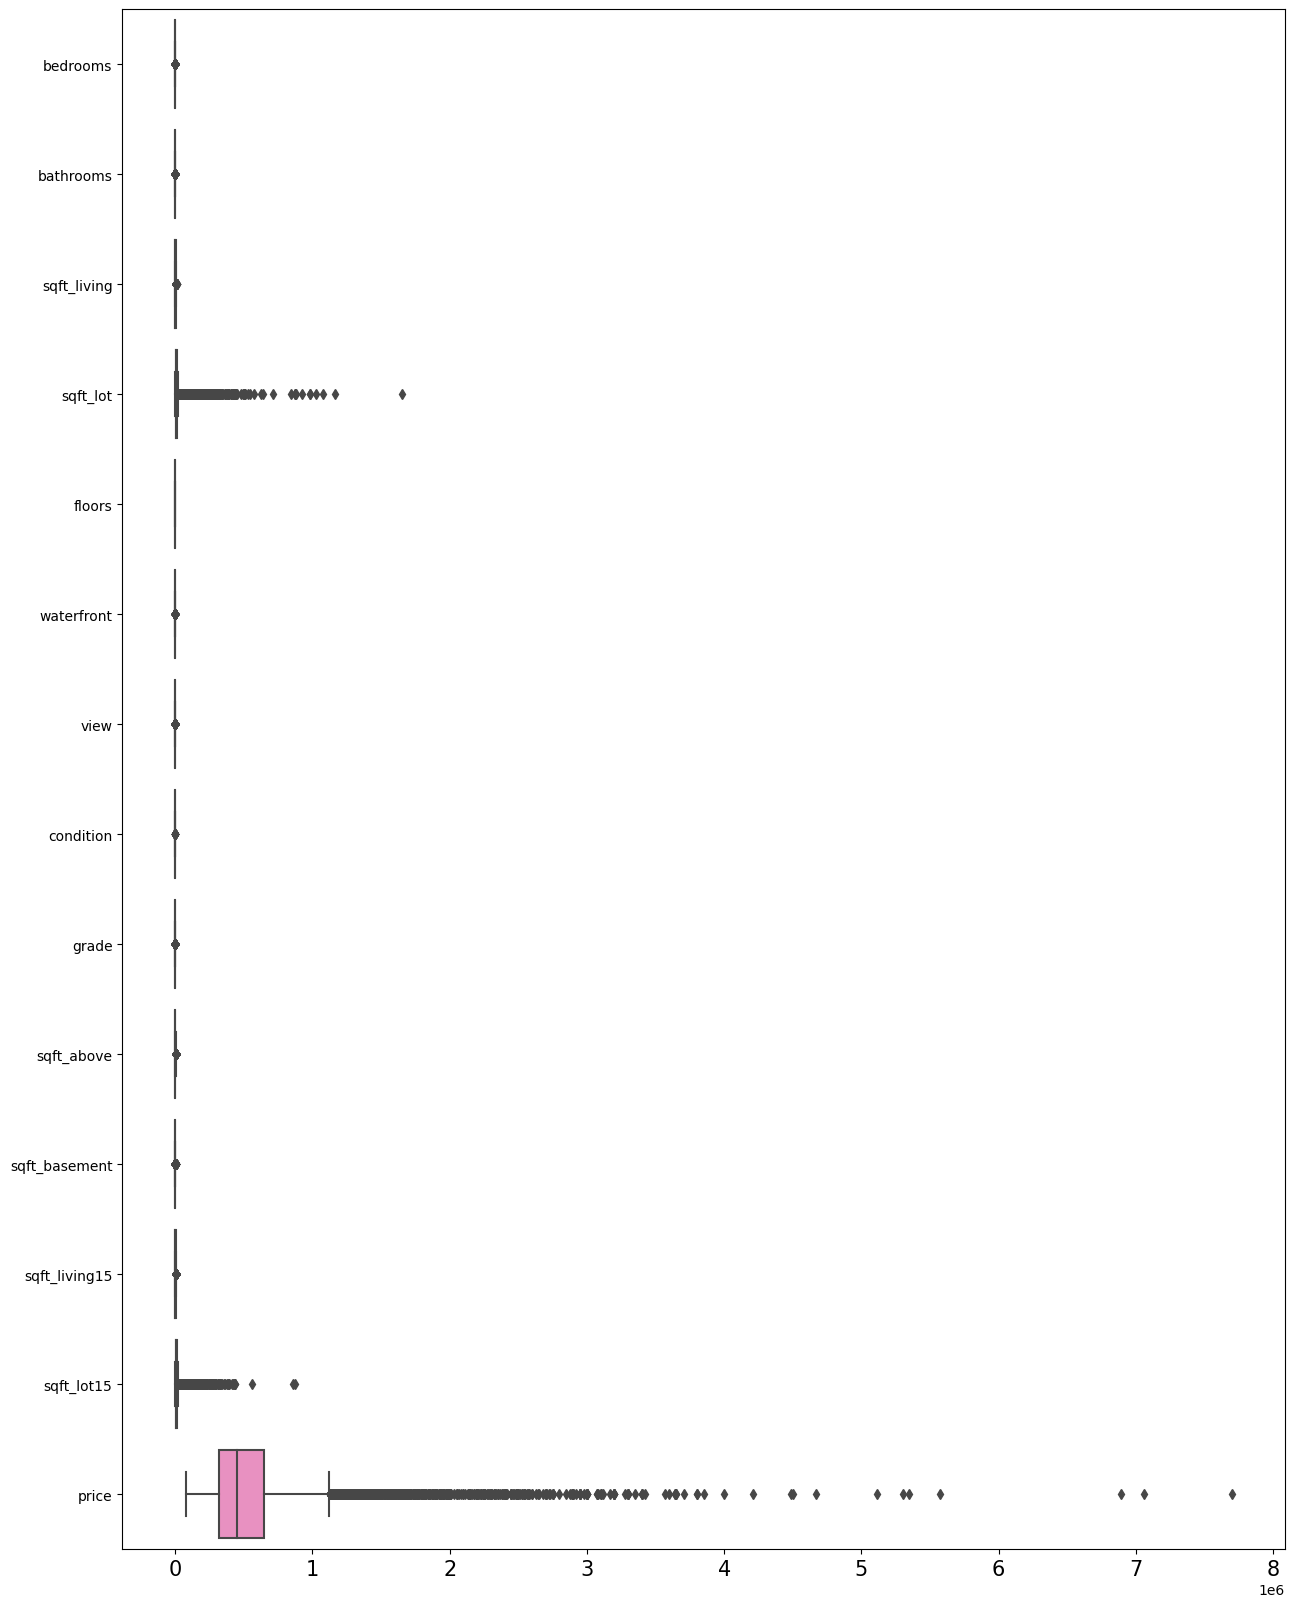

In [7]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [10]:
house_features = outlier_slayer(house_features)

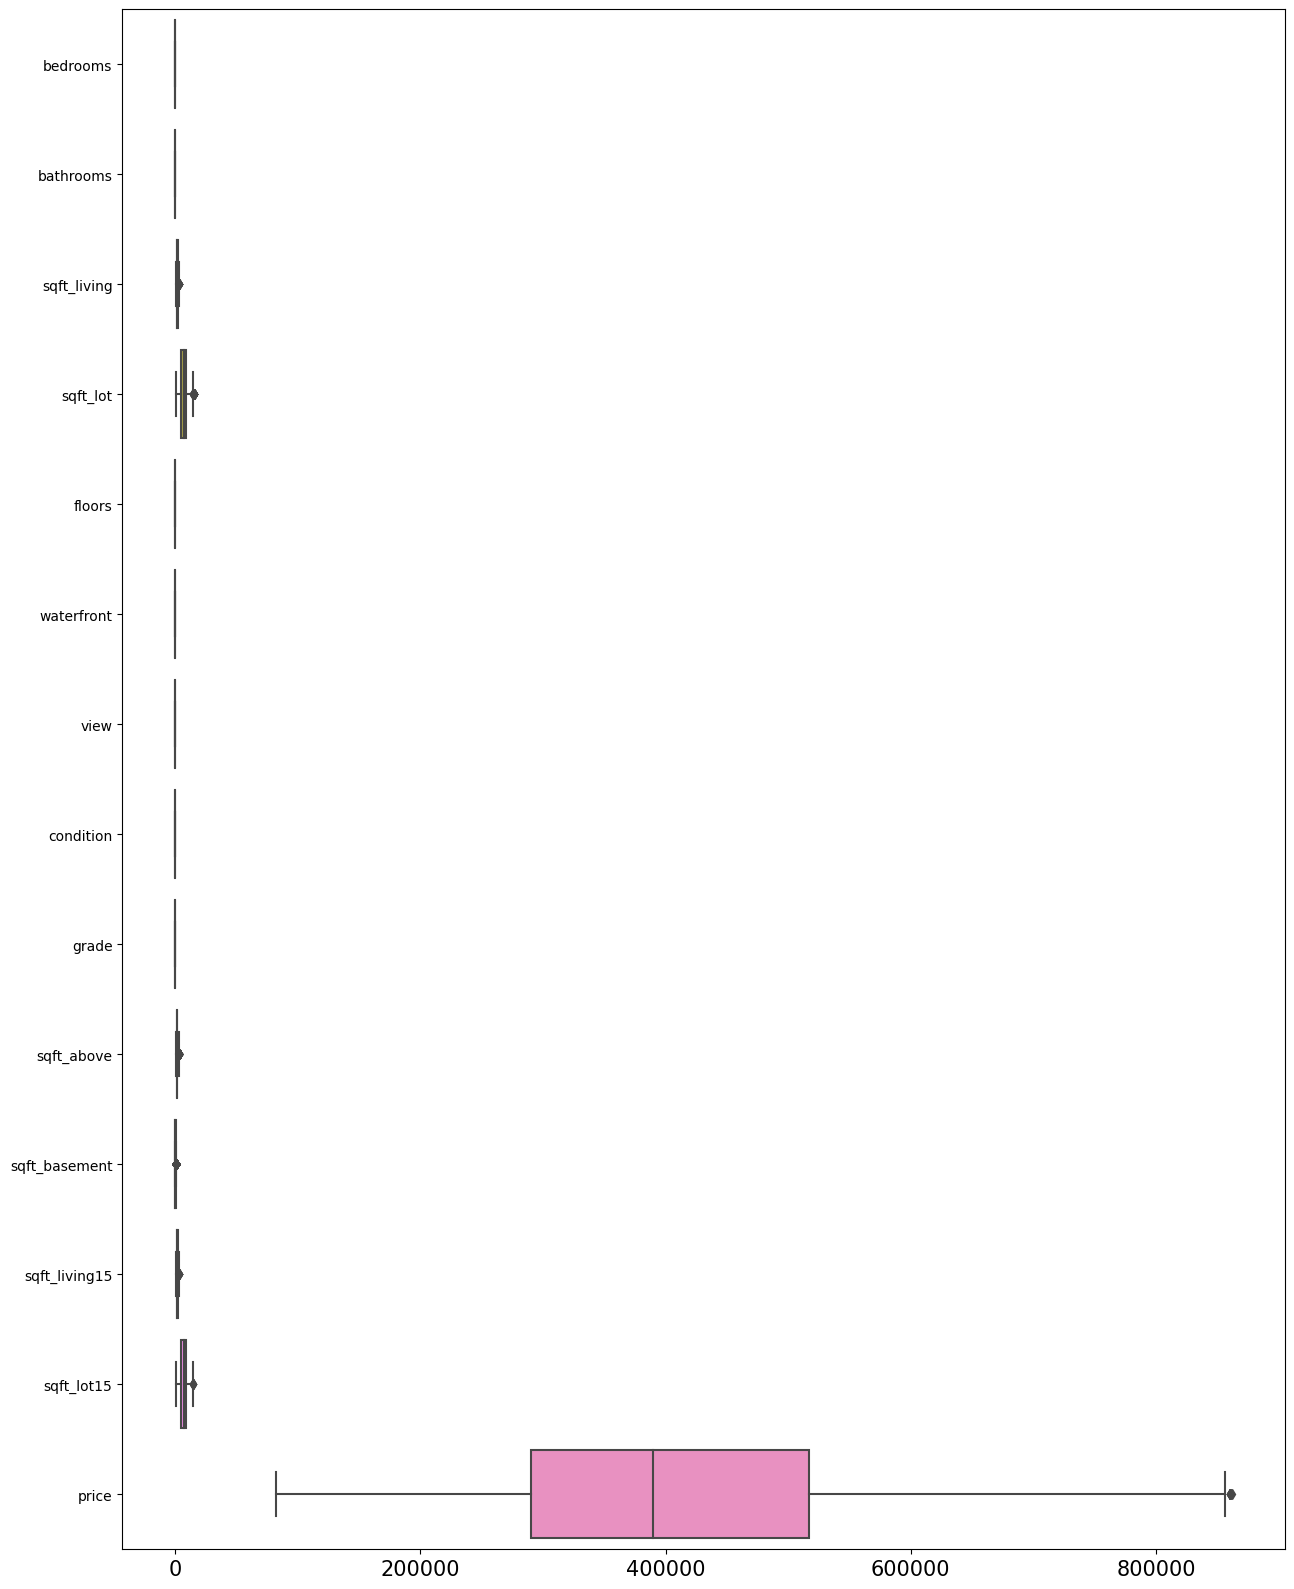

In [11]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [14]:
# Now we are able to predict higher property value - $650K.

<h2 style="color: #008080;">Updating the df</h2>

In [15]:
# Dropping old house_features 
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteraive proces...</h2>

In [17]:
df2 = cleaned

<h2 style="color: #008080;">X-Y Split</h2>

In [18]:
# Split the data into input and target variables
X = df2.drop("price", axis=1)
y = df2["price"]

<h2 style="color: #008080;">Normalizing the Data</h2>

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<h1 style="color: #00BFFF;">04 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [21]:
len(X_scaled)*0.7 # Len before the test

15116.499999999998

In [22]:
len(X_test) # Len after the test

6479

<h2 style="color: #008080;">Model Validation</h2>

In [23]:
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

In [24]:
# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6323
RMSE =  218923.5864
The value of the metric MSE is  47927536689.4592
MAE =  141766.2985


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* Removing outliers was an important step, but it did not significally improved our model. 
* Instead, it's slightly worst if we compare it from before:
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th>Linear Regression Model - First Attempt</th>
      <th>Second Model</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>
        R2 = 0.6326<br>
        RMSE = 218841.0967<br>
        MSE = 47891425625.3193<br>
        MAE = 141684.4693
      </td>
      <td>
        R2 = 0.6323<br>
        RMSE = 218923.5864<br>
        MSE = 47927536689.4592<br>
        MAE = 141766.2985
      </td>
    </tr>
  </tbody>
</table>

